In [1]:
import estimators
import utils

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams.update(utils.get_plt_settings())

save=True


# Brüser

- berücksichtigt nur die Intervallschätzungen, deren qSQI > 0.4 ist
- informativ falls Coverage auf Segment >= 80%

### q_th = 0.4

                 precision    recall  f1-score   support

non-informative       0.61      0.96      0.74    144049
    informative       0.76      0.18      0.30    109654

       accuracy                           0.62    253703
      macro avg       0.68      0.57      0.52    253703
   weighted avg       0.67      0.62      0.55    253703

MAE auf als informativ klassifizierten Segmenten: 11.48
MAE auf als informativ annotierten Segmenten:  3.18
MAE insgesamt:  20.78
MSE auf als informativ klassifizierten Segmenten: 307.87
MSE auf als informativ annotierten Segmenten:  17.06
MSE insgesamt:  1334.28


Coverage klassifiziert      : 10.46 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 gesamt           : 33.60 %
Fehler < 5 klassifiziert    : 4.89 %
Fehler < 10 gesamt          : 44.74 %
Fehler < 10 klassifiziert   : 6.64 %
Fehler < 15 gesamt          : 53.94 %
Fehler < 15 klassifiziert   : 7.50 %
Fehler < 20 gesamt  

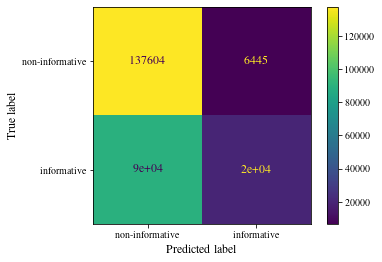

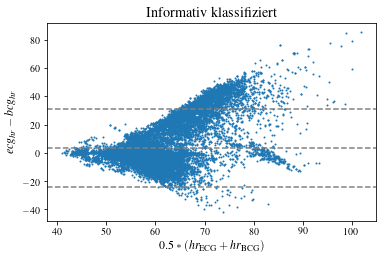

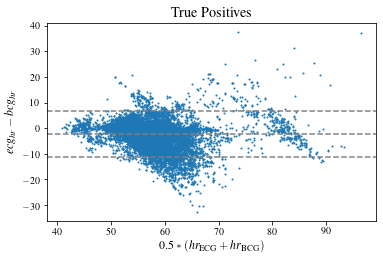

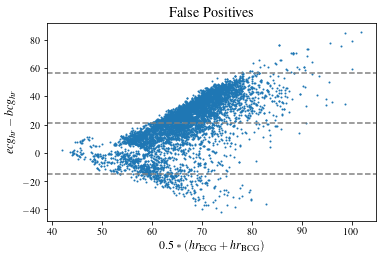

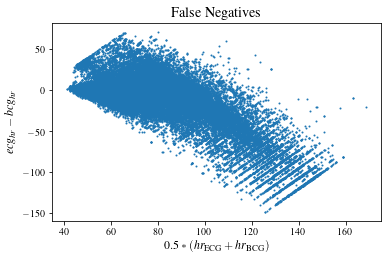

In [2]:
brueser = estimators.BrueserSingleSQI()
predicted = brueser.predict_all_labels()
labels = brueser.target
y_pred, y_true = brueser.predict_test_set()
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))
brueser.print_model_test_report()

print("\n Alle Daten")
print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th = 0.3

                 precision    recall  f1-score   support

non-informative       0.65      0.75      0.69    144049
    informative       0.58      0.46      0.51    109654

       accuracy                           0.62    253703
      macro avg       0.61      0.61      0.60    253703
   weighted avg       0.62      0.62      0.62    253703

MAE auf als informativ klassifizierten Segmenten: 16.47
MAE auf als informativ annotierten Segmenten:  3.18
MAE insgesamt:  20.78
MSE auf als informativ klassifizierten Segmenten: 469.23
MSE auf als informativ annotierten Segmenten:  17.06
MSE insgesamt:  1334.28


Coverage klassifiziert      : 34.11 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 gesamt           : 33.60 %
Fehler < 5 klassifiziert    : 8.34 %
Fehler < 10 gesamt          : 44.74 %
Fehler < 10 klassifiziert   : 14.25 %
Fehler < 15 gesamt          : 53.94 %
Fehler < 15 klassifiziert   : 18.90 %
Fehler < 20 gesamt

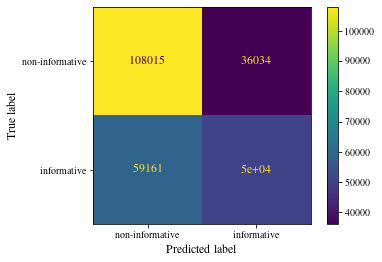

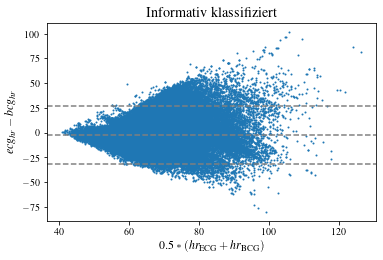

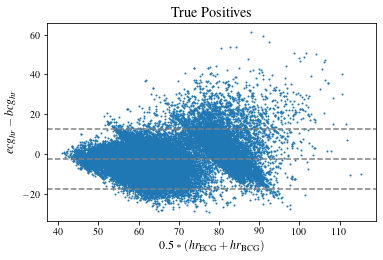

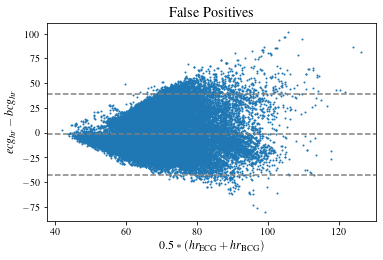

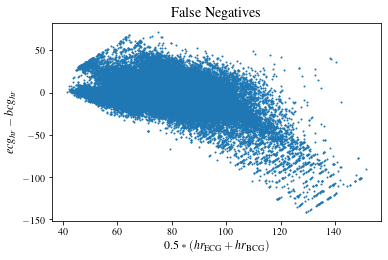

In [3]:
brueser = estimators.BrueserSingleSQI(sqi_threshold=0.3)
predicted = brueser.predict_all_labels()
labels = brueser.target
y_pred, y_true = brueser.predict_test_set()
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))
brueser.print_model_test_report()

print("\n Alle Daten")
print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th = 0.2

                 precision    recall  f1-score   support

non-informative       0.61      0.05      0.10    144049
    informative       0.43      0.96      0.60    109654

       accuracy                           0.44    253703
      macro avg       0.52      0.50      0.35    253703
   weighted avg       0.53      0.44      0.31    253703

MAE auf als informativ klassifizierten Segmenten: 20.29
MAE auf als informativ annotierten Segmenten:  3.18
MAE insgesamt:  20.78
MSE auf als informativ klassifizierten Segmenten: 625.76
MSE auf als informativ annotierten Segmenten:  17.06
MSE insgesamt:  1334.28


Coverage klassifiziert      : 95.05 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 gesamt           : 33.60 %
Fehler < 5 klassifiziert    : 14.31 %
Fehler < 10 gesamt          : 44.74 %
Fehler < 10 klassifiziert   : 27.48 %
Fehler < 15 gesamt          : 53.94 %
Fehler < 15 klassifiziert   : 39.97 %
Fehler < 20 gesam

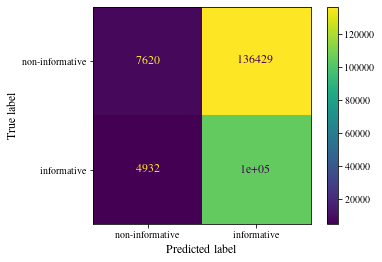

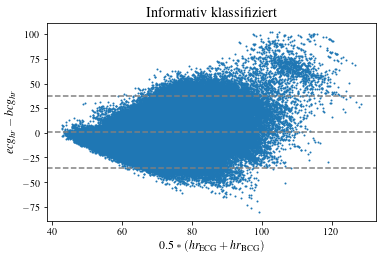

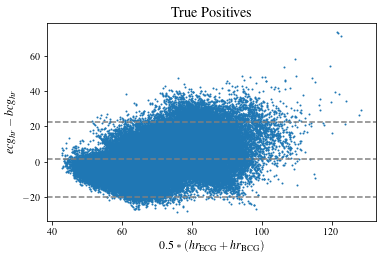

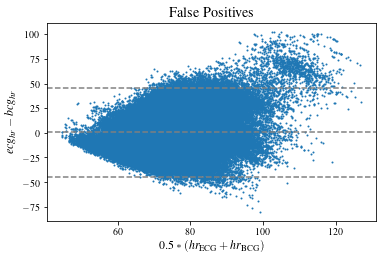

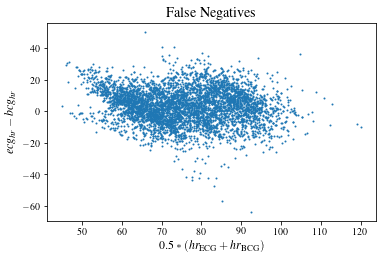

In [4]:
brueser = estimators.BrueserSingleSQI(sqi_threshold=0.2)
predicted = brueser.predict_all_labels()
labels = brueser.target
y_pred, y_true = brueser.predict_test_set()
class_names = ['non-informative', 'informative']
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names).plot()
print(classification_report(y_true, y_pred, target_names=class_names))
brueser.print_model_test_report()

print("\n Alle Daten")
print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)